# Words
**Description**: Words

### Model List

#### Amazon
- us.amazon.nova-micro-v1:0
- us.amazon.nova-lite-v1:0
- us.amazon.nova-pro-v1:0

#### Meta
- us.meta.llama3-2-1b-instruct-v1:0
- us.meta.llama3-2-3b-instruct-v1:0
- us.meta.llama3-1-8b-instruct-v1:0
- us.meta.llama3-2-11b-instruct-v1:0

#### Anthropic
- us.anthropic.claude-3-5-haiku-20241022-v1:0
- us.anthropic.claude-3-7-sonnet-20250219-v1:0

## Install

In [1]:
!pip install seaborn -q

## Import

In [2]:
import time
import boto3
import random
import warnings
import concurrent.futures

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from typing import Dict, Any
from botocore.exceptions import ClientError

In [3]:
sns.set(style="white")

### Methods

In [4]:
def converse(user_content, assistant_content, model_id, system=None, temperature=0.01, max_tokens=1024, region='us-east-1'):
    bedrock = boto3.client('bedrock-runtime', region)

    messages = [{'role': 'user', 'content': user_content}]
    messages = messages if assistant_content is None else  messages + [{'role': 'assistant', 'content': assistant_content}]

    system = [{'text': 'You are a helpful assistant.'}] if system is None else system
    inferenceConfig = {'maxTokens': max_tokens, 'temperature': temperature}
    response = bedrock.converse(
        modelId=model_id,
        inferenceConfig=inferenceConfig,
        system=system,
        messages=messages,
    )
    return response

In [5]:
def converse_summary(doc_list, prompt_text='Summarize the above docs.', model_id='us.amazon.nova-lite-v1:0', system_text=None, response_start=None):
    system = system_text if system_text is None else [{'text': system_text}]
    prompt_text = '\n\n'.join(doc_list + [prompt_text])
    prompt = [{'text': prompt_text}]
    assistant_content = response_start if response_start is None else [{'text': response_start}]
    response = converse(
        user_content=prompt,
        assistant_content=assistant_content,
        model_id=model_id,
        system=system,
        temperature=0.01,
        max_tokens=1024
    )
    summary = response['output']['message']['content'][0]['text']
    if not response_start is None:
        summary = response_start + summary
    return summary, int(response.get('usage').get('inputTokens')), int(response.get('usage').get('outputTokens')), int(response.get('metrics').get('latencyMs'))

In [6]:
SUPPORTED_MODEL_COST = {
    'us.amazon.nova-micro-v1:0': [0.000035, 0.00014, 'Nova Micro'],
    'us.amazon.nova-lite-v1:0': [0.00006, 0.00024, 'Nova Lite'],
    'us.amazon.nova-pro-v1:0': [0.0008, 0.0002, 'Nova Pro'],
    'us.meta.llama3-2-1b-instruct-v1:0': [0.0001, 0.0001, 'Llama 1B'],
    'us.meta.llama3-2-3b-instruct-v1:0': [0.00015, 0.00015, 'Llama 3B'],
    'us.meta.llama3-1-8b-instruct-v1:0': [0.00022, 0.00022, 'Llama 8B'],
    'us.meta.llama3-2-11b-instruct-v1:0': [0.00016, 0.00016, 'Llama 11B'],
    'us.anthropic.claude-3-5-haiku-20241022-v1:0': [0.0008, 0.004, 'Haiku 3.5'],
    'us.anthropic.claude-3-7-sonnet-20250219-v1:0': [0.003, 0.015, 'Sonnet 3.7'],
}

MODELS = list(SUPPORTED_MODEL_COST.keys())[:-1]

def model_price(tokens_in: int, tokens_out: int, model_id: str) -> float:
    if model_id not in SUPPORTED_MODEL_COST.keys():
        warnings.warn(f'Model ID: "{model_id}" is not in the list of supported models.\n{SUPPORTED_MODEL_COST.keys()}')
        return None

    cost_in = SUPPORTED_MODEL_COST.get(model_id)[0] * tokens_in / 1000.
    cost_out = SUPPORTED_MODEL_COST.get(model_id)[1] * tokens_out / 1000.
    cost_total = cost_in + cost_out
    return cost_total

#### Test Methods

In [7]:
doc1 = '''
Amazon Bedrock
The easiest way to build and scale generative AI applications with foundation models
Get started with Amazon Bedrock
Try free demo
What is Amazon Bedrock?
Amazon Bedrock is a fully managed service that offers a choice of high-performing foundation models (FMs) from leading AI companies like AI21 Labs, Anthropic, Cohere, DeepSeek, Luma, Meta, Mistral AI, poolside (coming soon), Stability AI, and Amazon through a single API, along with a broad set of capabilities you need to build generative AI applications with security, privacy, and responsible AI. Using Amazon Bedrock, you can easily experiment with and evaluate top FMs for your use case, privately customize them with your data using techniques such as fine-tuning and Retrieval Augmented Generation (RAG), and build agents that execute tasks using your enterprise systems and data sources. Since Amazon Bedrock is serverless, you don't have to manage any infrastructure, and you can securely integrate and deploy generative AI capabilities into your applications using the AWS services you are already familiar with.

Learn more about Amazon Bedrock developer experience


How customers are innovating with generative AI on Amazon Bedrock
See the full Amazon Bedrock customer stories playlist


Amazon Bedrock demo
Watch this video to see Swami Sivasubramanian, Vice President of Data and AI at AWS, walk through a demo highlighting how you can create new customer experiences using Amazon Bedrock in your organization to build generative AI applications with your data.


Everything you need to build generative AI applications

Model choice

Customization

RAG

Agents

Data Automation
Choose from a range of leading FMs
Amazon Bedrock helps you rapidly adapt and take advantage of the latest generative AI innovations with easy access to a choice of high-performing FMs from leading AI companies like AI21 Labs, Anthropic, Cohere, DeepSeek, Luma, Meta, Mistral AI, poolside (coming soon), Stability AI, and Amazon. In addition. Amazon Bedrock Marketplace, lets you discover, test, and use over 100 popular, emerging and specialized FMs on fully managed endpoints. The single-API access of Amazon Bedrock, regardless of the models you choose, gives you the flexibility to use different FMs and upgrade to the latest model versions with minimal code changes.

Learn more about Custom Model Import for Amazon Bedrock
'''
doc_list = [doc1]
prompt_text = 'Summarize the above documents.'
model_id = 'us.meta.llama3-1-8b-instruct-v1:0'
summary, in_tokens, out_tokens, latency = converse_summary(doc_list, prompt_text, model_id, system_text=None)
print(summary)
print(in_tokens)
print(out_tokens)
print(latency)



Here's a summary of the Amazon Bedrock documentation:

**What is Amazon Bedrock?**

Amazon Bedrock is a fully managed service that allows users to build and scale generative AI applications with foundation models (FMs) from leading AI companies. It provides a single API to access a range of high-performing FMs, making it easy to experiment, evaluate, and customize models for specific use cases.

**Key Features**

* Choose from a range of leading FMs from top AI companies
* Customize models with private data using techniques like fine-tuning and Retrieval Augmented Generation (RAG)
* Build agents that execute tasks using enterprise systems and data sources
* Serverless infrastructure management
* Secure integration and deployment of generative AI capabilities using AWS services

**Benefits**

* Rapid adaptation to the latest generative AI innovations
* Easy access to a wide range of FMs
* Minimal code changes required to upgrade to new model versions
* Secure and responsible AI develo

In [8]:
in_tokens = 800 * 10000 * 30 # tokens in per search * searches per day * days in the month
out_tokens = 400 * 10000 * 30 # tokens out per search * searches per day * days in the month
model_id = 'us.amazon.nova-lite-v1:0'
monthly_cost = model_price(tokens_in=in_tokens, tokens_out=out_tokens, model_id=model_id)
print(monthly_cost)

model_id = 'us.deepseek.r1-v1:0'
monthly_cost = model_price(tokens_in=in_tokens, tokens_out=out_tokens, model_id=model_id)
print(monthly_cost)

43.2
None


/tmp/ipykernel_11862/4045191055.py:17: UserWarning: Model ID: "us.deepseek.r1-v1:0" is not in the list of supported models.
dict_keys(['us.amazon.nova-micro-v1:0', 'us.amazon.nova-lite-v1:0', 'us.amazon.nova-pro-v1:0', 'us.meta.llama3-2-1b-instruct-v1:0', 'us.meta.llama3-2-3b-instruct-v1:0', 'us.meta.llama3-1-8b-instruct-v1:0', 'us.meta.llama3-2-11b-instruct-v1:0', 'us.anthropic.claude-3-5-haiku-20241022-v1:0', 'us.anthropic.claude-3-7-sonnet-20250219-v1:0'])
  warnings.warn(f'Model ID: "{model_id}" is not in the list of supported models.\n{SUPPORTED_MODEL_COST.keys()}')


## Data

### Example Documents

##### Source: 

In [9]:
example_doc_1 = '''
doc 1
'''

##### Source:

In [10]:
example_doc_2 = '''
doc 2
'''

##### Source:

In [11]:
example_doc_3 = '''
doc 3
'''

##### Source:

In [12]:
example_doc_4 = '''
doc 4
'''

##### Source:

In [13]:
example_doc_5 = '''
doc 5
'''

##### Source:

In [14]:
example_doc_6 = '''
doc 6
'''

##### Source:

In [15]:
example_doc_7 = '''
doc 7
'''

##### Source:

In [16]:
example_doc_8 = '''
doc 8
'''

##### Source:

In [17]:
example_doc_9 = '''
doc 9
'''

In [18]:
DOCUMENTS = [example_doc_1, example_doc_2, example_doc_3, example_doc_4, example_doc_5, example_doc_6, example_doc_7, example_doc_8, example_doc_9]

## Prompts

#### System Prompts

In [19]:
SYSTEM_BASE = '''
You are a summarization assistant.
You are tasked with giving a short and meaningful summary of our products and spec pages returned in a search.
This will be presented to extrnal users, so return summaries that answer the question based on the user request.
The summaries should be short and to the point.
Use no more than 500 words.
Format the output as a markdown document without a title.
'''

#### Summary Prompts

In [20]:
PROMPT_BASE = '''
Summarize the above documents.
Produce a markdown document without a title in <markdown></markdown> tags.
'''

## Benchmark Models
**Description**:

### Benchmark Methods

In [21]:
def run_summary_trials(
    documents,
    doc_sample=3,
    trials=10,
    parse_tags=('<markdown>', '</markdown>'),
    prompt_text=PROMPT_BASE,
    model_id='us.amazon.nova-lite-v1:0',
    system_text=SYSTEM_BASE,
    response_start='<markdown>'
):
    cost_list = []
    latency_list = []
    parse_list = []
    summary_list = []
    if '.meta.' in model_id:
        response_start = None

    for _ in range(trials):
        doc_list = random.sample(documents, doc_sample)
        try:
            summary, in_tokens, out_tokens, latency = converse_summary(doc_list, prompt_text, model_id, system_text, response_start)
            latency_list.append(latency)
            cost_list.append(model_price(tokens_in=in_tokens, tokens_out=out_tokens, model_id=model_id))
            summary_list.append(summary)
        except ClientError as e:
            if e.response['Error']['Code'] == 'ThrottlingException':
                print(f"Throttling Exception occurred: {e}")
                time.sleep(61)
                continue
            else:
                break
        except Exception as e:
            print(e)
            break

        try:
            assert(parse_tags[0] in summary)
            assert(parse_tags[1] in summary)
            summary = (summary.split(parse_tags[0])[1]).split(parse_tags[1])[0]
            parse_list.append(1)
        except Exception as e:
            parse_list.append(0)

    cost_avg = np.mean(cost_list)
    latency_avg = np.mean(latency_list)
    parse_acc = np.mean(parse_list) * 100.
    return summary_list, cost_avg, latency_avg, parse_acc

In [22]:
def process_model(model_id: str, doc_sample: int, trials: int) -> Dict[str, Any]:
    print(f"\nTesting model: {model_id}")
    common_name = SUPPORTED_MODEL_COST[model_id][2]

    # Test without system prompt
    print("Testing without system prompt...")
    no_system = run_summary_trials(
        documents=DOCUMENTS,
        doc_sample=doc_sample,
        trials=trials,
        model_id=model_id,
        system_text=None
    )

    # Test with system prompt
    print("Testing with system prompt...")
    with_system = run_summary_trials(
        documents=DOCUMENTS,
        doc_sample=doc_sample,
        trials=trials,
        model_id=model_id,
        system_text=SYSTEM_BASE
    )

    # Print interim results
    print(f"\nInterim Results for {model_id}:")
    print(f"Without system - Cost: ${no_system[1]:.4f}, Latency: {no_system[2]/1000:.2f}s, Accuracy: {no_system[3]:.1f}%")
    print(f"With system - Cost: ${with_system[1]:.4f}, Latency: {with_system[2]/1000:.2f}s, Accuracy: {with_system[3]:.1f}%")

    return {
        'name': common_name,
        'no_system': {
            'summaries': no_system[0],
            'avg_cost': no_system[1],
            'avg_latency': no_system[2],
            'parse_accuracy': no_system[3]
        },
        'with_system': {
            'summaries': with_system[0],
            'avg_cost': with_system[1],
            'avg_latency': with_system[2],
            'parse_accuracy': with_system[3]
        }
    }

In [23]:
def display_benchmark_results(results, show_plots=True):
    """Display formatted benchmark results and optionally show visualizations.
    
    Args:
        results: Dictionary containing benchmark results per model
        show_plots: Whether to display matplotlib visualizations
    """
    print("\n=== Complete Benchmark Results ===\n")
    total_cost_no_system = total_cost_with_system = 0
    total_latency_no_system = total_latency_with_system = 0

    for model_id in MODELS:
        model_results = results[model_id]
        print(f"\nModel: {model_id}")
        print("-" * (len(model_id) + 7))

        for test_type in ['no_system', 'with_system']:
            results_data = model_results[test_type]
            print(f"\n{'With' if test_type == 'with_system' else 'Without'} System Prompt:")
            print(f"Average cost: ${results_data['avg_cost']:.4f}")
            print(f"Average latency: {results_data['avg_latency']/1000:.2f}s")
            print(f"Parse accuracy: {results_data['parse_accuracy']:.1f}%")

            if test_type == 'no_system':
                total_cost_no_system += results_data['avg_cost']
                total_latency_no_system += results_data['avg_latency']
            else:
                total_cost_with_system += results_data['avg_cost']
                total_latency_with_system += results_data['avg_latency']

    print("\n=== Overall Statistics ===")
    print(f"\nTotal average cost without system prompt: ${total_cost_no_system:.4f}")
    print(f"Total average cost with system prompt: ${total_cost_with_system:.4f}")
    print(f"Total average latency without system prompt: {total_latency_no_system/1000:.2f}s")
    print(f"Total average latency with system prompt: {total_latency_with_system/1000:.2f}s")

    if show_plots:
        # Create figure with subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # Prepare data for plotting
        model_names = [x for x in MODELS if x in results.keys()]
        model_lbls = [SUPPORTED_MODEL_COST[x][2] for x in model_names]
        x = np.arange(len(model_names))
        width = 0.35

        # Cost comparison plot
        costs_no_system = [results[model]['no_system']['avg_cost'] for model in model_names]
        costs_with_system = [results[model]['with_system']['avg_cost'] for model in model_names]

        ax1.bar(x - width/2, costs_no_system, width, label='Without System')
        ax1.bar(x + width/2, costs_with_system, width, label='With System')
        ax1.set_ylabel('Average Cost ($)')
        ax1.set_title('Cost Comparison by Model')
        ax1.set_xticks(x)
        ax1.set_xticklabels(model_lbls, rotation=50)
        ax1.legend()

        # Latency comparison plot
        latency_no_system = [results[model]['no_system']['avg_latency']/1000 for model in model_names]
        latency_with_system = [results[model]['with_system']['avg_latency']/1000 for model in model_names]

        ax2.bar(x - width/2, latency_no_system, width, label='Without System')
        ax2.bar(x + width/2, latency_with_system, width, label='With System')
        ax2.set_ylabel('Average Latency (s)')
        ax2.set_title('Latency Comparison by Model')
        ax2.set_xticks(x)
        ax2.set_xticklabels(model_lbls, rotation=50)
        ax2.legend()

        # Parse accuracy plot
        accuracy_no_system = [results[model]['no_system']['parse_accuracy'] for model in model_names]
        accuracy_with_system = [results[model]['with_system']['parse_accuracy'] for model in model_names]

        ax3.bar(x - width/2, accuracy_no_system, width, label='Without System')
        ax3.bar(x + width/2, accuracy_with_system, width, label='With System')
        ax3.set_ylabel('Parse Accuracy (%)')
        ax3.set_title('Parse Accuracy by Model')
        ax3.set_xticks(x)
        ax3.set_xticklabels(model_lbls, rotation=50)
        ax3.legend()

        # Total comparisons
        metrics = ['Cost ($ x 5,000)', 'Latency (s)']
        totals_no_system = [5000*total_cost_no_system, total_latency_no_system/1000]
        totals_with_system = [5000*total_cost_with_system, total_latency_with_system/1000]

        x = np.arange(len(metrics))
        ax4.bar(x - width/2, totals_no_system, width, label='Without System')
        ax4.bar(x + width/2, totals_with_system, width, label='With System')
        ax4.set_ylabel('Value')
        ax4.set_title('Total Metrics Comparison')
        ax4.set_xticks(x)
        ax4.set_xticklabels(metrics)
        ax4.legend()

        plt.tight_layout()
        plt.show()

### Run Full Benchmark

In [24]:
tic = time.time()
doc_sample = 3  # How many documents to include in the summary
trials = 25  # How many trials to run when testing a model

# Use a ThreadPoolExecutor to run the tests in parallel
results = {}
with concurrent.futures.ProcessPoolExecutor() as executor: # with concurrent.futures.ThreadPoolExecutor() as executor:
    # Create a dictionary of futures
    future_to_model = {
        executor.submit(process_model, model_id, doc_sample, trials):
            model_id for model_id in MODELS
    }
    # Collect results as they complete
    for future in concurrent.futures.as_completed(future_to_model):
        model_id = future_to_model[future]
        try:
            results[model_id] = future.result()
        except Exception as e:
            print(f"Model {model_id} generated an exception: {e}")
toc = time.time()


Testing model: us.amazon.nova-micro-v1:0
Testing model: us.amazon.nova-lite-v1:0
Testing without system prompt...
Testing without system prompt...

Testing with system prompt...
Testing with system prompt...

Interim Results for us.amazon.nova-lite-v1:0:
Without system - Cost: $0.0000, Latency: 0.95s, Accuracy: 100.0%
With system - Cost: $0.0001, Latency: 1.89s, Accuracy: 100.0%

Testing model: us.amazon.nova-pro-v1:0
Testing without system prompt...

Interim Results for us.amazon.nova-micro-v1:0:
Without system - Cost: $0.0000, Latency: 0.92s, Accuracy: 96.0%
With system - Cost: $0.0001, Latency: 2.32s, Accuracy: 100.0%

Testing model: us.meta.llama3-2-1b-instruct-v1:0
Testing without system prompt...
Throttling Exception occurred: An error occurred (ThrottlingException) when calling the Converse operation (reached max retries: 4): Too many requests, please wait before trying again.
Testing with system prompt...Throttling Exception occurred: An error occurred (ThrottlingException) wh

### Display Results


=== Complete Benchmark Results ===


Model: us.amazon.nova-micro-v1:0
--------------------------------

Without System Prompt:
Average cost: $0.0000
Average latency: 0.92s
Parse accuracy: 96.0%

With System Prompt:
Average cost: $0.0001
Average latency: 2.32s
Parse accuracy: 100.0%

Model: us.amazon.nova-lite-v1:0
-------------------------------

Without System Prompt:
Average cost: $0.0000
Average latency: 0.95s
Parse accuracy: 100.0%

With System Prompt:
Average cost: $0.0001
Average latency: 1.89s
Parse accuracy: 100.0%

Model: us.amazon.nova-pro-v1:0
------------------------------

Without System Prompt:
Average cost: $0.0001
Average latency: 2.33s
Parse accuracy: 100.0%

With System Prompt:
Average cost: $0.0001
Average latency: 3.10s
Parse accuracy: 100.0%

Model: us.meta.llama3-2-1b-instruct-v1:0
----------------------------------------

Without System Prompt:
Average cost: $0.0000
Average latency: 3.44s
Parse accuracy: 8.0%

With System Prompt:
Average cost: $0.0001
Average la

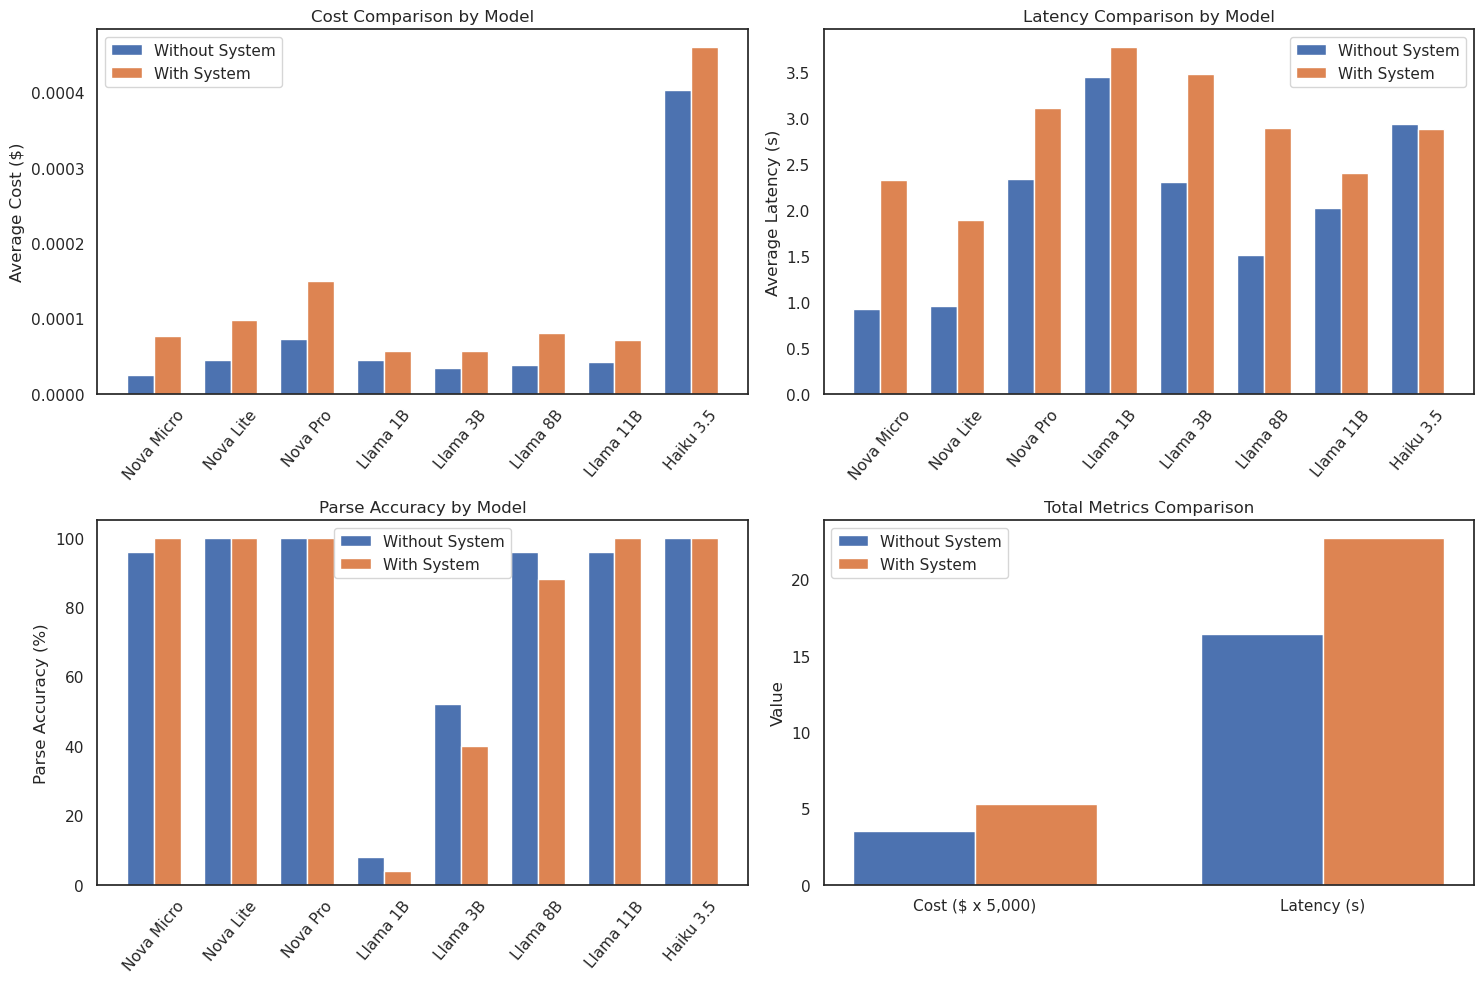

In [25]:
display_benchmark_results(results)